# Clustering Music Genres

Clustering music genres with machine learning using Python.

About Dataset: This file contains data about the audio features of the Top 2000 tracks of all time available on Spotify.
Data contains 15 columns and 1995 songs to explore.

Dataset: https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset

Example Solution: https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/

Hugging Face: https://huggingface.co/spaces/alperugurcan/Music-Genre-Clustering

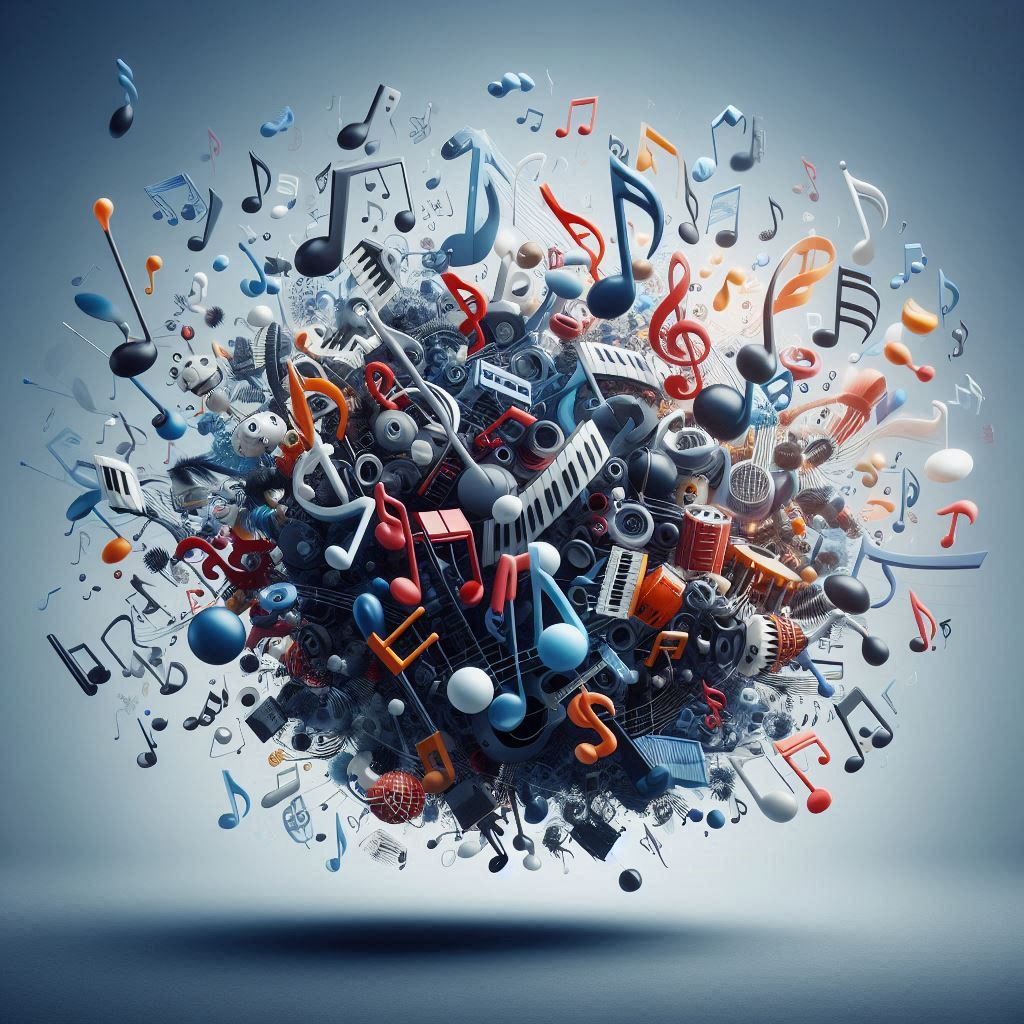

## 1. Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer



In [2]:
df=pd.read_csv("Spotify-2000.csv")
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [4]:
df.describe(include="all")

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994,1994,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994,1994.000000,1994.000000,1994.00000
unique,NaN,1958,731,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350,NaN,NaN,NaN
top,NaN,One,Queen,album rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN
freq,NaN,3,37,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN
mean,997.500000,NaN,NaN,NaN,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,NaN,28.858074,4.994985,59.52658
std,575.762538,NaN,NaN,NaN,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,NaN,29.011986,4.401566,14.35160
min,1.000000,NaN,NaN,NaN,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,NaN,0.000000,2.000000,11.00000
25%,499.250000,NaN,NaN,NaN,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,NaN,3.000000,3.000000,49.25000
50%,997.500000,NaN,NaN,NaN,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,NaN,18.000000,4.000000,62.00000
75%,1495.750000,NaN,NaN,NaN,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,NaN,50.000000,5.000000,71.00000


In [5]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [6]:
print(df.Title.nunique())
print(df.Artist.nunique())
print(df["Top Genre"].nunique())
print(df["Length (Duration)"].nunique())
df["Length (Duration)"] = df["Length (Duration)"].str.replace(",", "").astype(int)

1958
731
149
350


In [7]:
df.drop(columns="Index", inplace=True)

In [8]:
df.corr(numeric_only=True)

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.050346,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness (dB),0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length (Duration),-0.050346,0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.027826,-0.098256,1.000000,0.111689


## 2. Data Preprocessing and Feature Engineering

In [9]:
df = df[["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness"]]

In [10]:
for i in df.columns:
    MinMaxScaler(i)

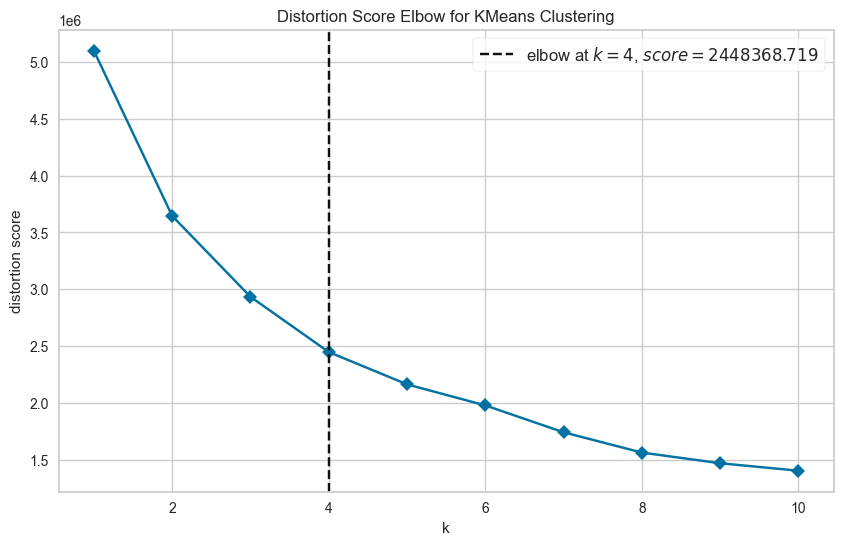

In [11]:
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(
    KMeans(random_state=42),
    k=(1, 11),
    metric='distortion',
    timings=False
)
visualizer.fit(df)
visualizer.show();

## 3. Clustering and Evaluation


In [12]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)
df["Music Segments"] = clusters

MinMaxScaler(feature_range=0       2
1       1
2       0
3       0
4       1
       ..
1989    2
1990    0
1991    0
1992    0
1993    2
Name: Music Segments, Length: 1994, dtype: int32)

In [13]:
df.head()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Music Segments
0,157,-14,11,68,94,3,2
1,135,-11,17,81,17,7,1
2,168,-9,7,52,2,17,0
3,173,-4,3,37,0,4,0
4,106,-5,10,87,1,3,1


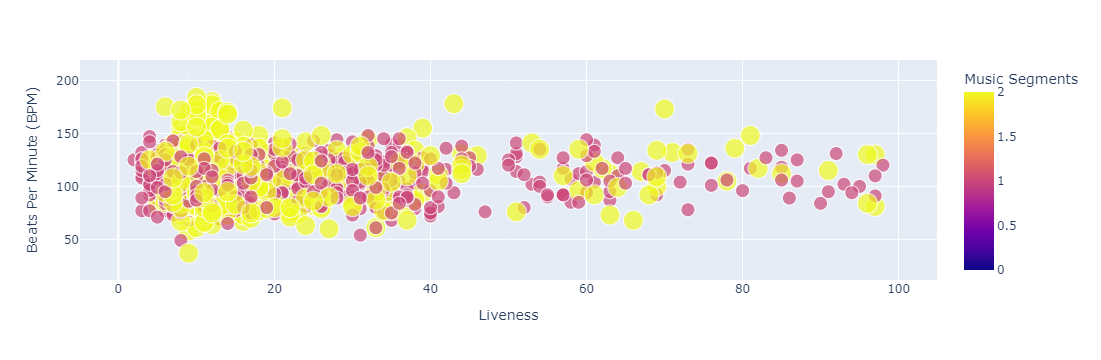

In [25]:
import plotly.express as px
fig = px.scatter(df, x="Liveness", y="Beats Per Minute (BPM)", size="Music Segments", color="Music Segments")
fig.show() #use flask to show the plot

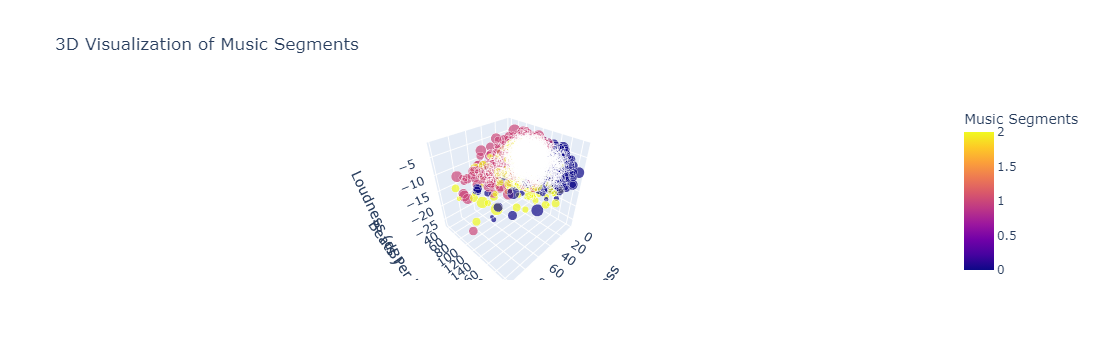

In [30]:

fig = px.scatter_3d(df, 
                    x='Liveness', 
                    y='Beats Per Minute (BPM)', 
                    z='Loudness (dB)',
                    color='Music Segments',
                    size='Valence',
                    hover_data=['Acousticness', 'Speechiness'],
                    title='3D Visualization of Music Segments')

fig.show()